In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

if not os.path.isdir('figures'):
    os.makedirs('figures')

In [2]:
def label_season(year):
    if year == 2020:
        return 'Season 10'
    if year == 2022:
        return 'Season 13'
    if year == 2023:
        return 'Season 15'
    return None


def add_days_after_planting(df, day_of_planting='2022-11-11'):
    day_of_planting = pd.to_datetime(day_of_planting)
    df['days_after_planting'] = (pd.to_datetime(df['date']) - day_of_planting).dt.days
    return df

In [3]:
sns.set_context('talk', font_scale=1, rc={"lines.linewidth": 1.6}) #paper, notebook, talk, poster
#'poster', font_scale=0.5

# Get the 'Paired' color palette
palette = sns.color_palette("Paired")

# Define the RGB values for a lighter shade of brown
lighter_brown = (205/255 + 0.1, 133/255 + 0.1, 63/255 + 0.1)  # RGB values for lighter brown

# Replace yellow with light brown in the palette
palette[10] = lighter_brown

sns.set_palette(palette='colorblind') #palette)
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [4]:
# Open data frame
df = pd.read_csv('./heritability/all_heritabilities.csv')

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year from 'date'
df['year'] = df['date'].dt.year

In [5]:
# Apply the function to the 'year' column to create the 'season' column
df['season'] = df['year'].apply(label_season)

In [6]:
# Add days after planting
df_s10 = add_days_after_planting(df=df[df['season']== 'Season 10'], day_of_planting='2019-11-13')
df_s13 = add_days_after_planting(df=df[df['season']== 'Season 13'], day_of_planting='2021-12-02')
df_s15 = add_days_after_planting(df=df[df['season']== 'Season 15'], day_of_planting='2022-11-15')
df = pd.concat([df_s10, df_s13, df_s15])

In [7]:
# # Group by 'season' and 'trait', and calculate the mean of 'broad_sense_heritability'
# grouped_df = df.groupby(['season', 'trait'])['broad_sense_heritability'].mean().reset_index()

# # Filter the groups that have an average 'broad_sense_heritability' of more than 0.6
# filtered_df = grouped_df[grouped_df['broad_sense_heritability'] > 0.8]
# filtered_df = filtered_df[['season', 'trait']]
# df = df.merge(filtered_df, on=['season', 'trait'])
df = df[df['date']!='2020-01-29']

In [8]:
# phenotype_list = [
#     'axis_aligned_bounding_box', 'oriented_bounding_box', 'hull_volume', 'height'
#     # , 'length', 'width', 'num_points',  + ['persistence_entropy_0']
# ]
# df = df[df['trait'].isin(phenotype_list)]

In [9]:
df = df[~df['trait'].isin(['num_points', 'width', 'length', 'oriented_bounding_box'])]

In [10]:
df[df['trait'].str.contains('')]

,trait,broad_sense_heritability,repeatability,date,year,season,days_after_planting
1,hull_volume,0.780490,0.563053,2020-01-21,2020,Season 10,69
3,axis_aligned_bounding_box,0.882083,0.760235,2020-01-21,2020,Season 10,69
4,persistence_entropy_0,0.816945,0.606611,2020-01-21,2020,Season 10,69
5,persistence_entropy_1,0.760793,0.514601,2020-01-21,2020,Season 10,69
6,persistence_entropy_2,0.224321,0.087922,2020-01-21,2020,Season 10,69
...,...,...,...,...,...,...,...
1897,amplitude_heat_2,0.575250,0.411968,2023-03-07,2023,Season 15,112
1898,amplitude_persistence_image_0,0.947631,0.908063,2023-03-07,2023,Season 15,112
1899,amplitude_persistence_image_1,0.932779,0.878637,2023-03-07,2023,Season 15,112
1900,amplitude_persistence_image_2,0.611195,0.440087,2023-03-07,2023,Season 15,112


In [11]:
traditional = [
    'hull_volume', 'axis_aligned_bounding_box', 'height' #'length', 'width', 'oriented_bounding_box',
]

df['Data Type'] = df['trait'].apply(lambda x: 'Traditional' if x in traditional else 'Topological')

In [12]:
df['Data Type'].unique()

array(['Traditional', 'Topological'], dtype=object)

In [13]:
# df['trait'] = df['Data Type'] + " - " + df['trait']

In [14]:
df = df.sort_values(['season', 'trait'])
df = df[~df['trait'].str.contains('_2')]
df = df[~df['trait'].str.contains('_1')]

In [15]:
# # Convert 'date' to day of year
# df['day_of_year'] = df['date'].dt.dayofyear

# # Create relplot with 'season' as column
# rel = sns.relplot(data=df[df['Data Type']=='Traditional'], x='days_after_planting', y='broad_sense_heritability', hue='trait', col='season', kind='line', palette="Paired")
# rel.set(xlabel='Days after planting', ylabel='Broad Sense Heritability', ylim=(0, 1))
# rel.set_titles(row_template = '{row_name}', col_template = '{col_name}')

# # sns.move_legend(
# #     rel, "lower center",
# #     bbox_to_anchor=(.4, -0.15), ncol=4, title=None, frameon=False,
# # )

# plt.savefig('figures/heritability_line.png', dpi=900, bbox_inches='tight', facecolor='white', edgecolor='white')
# plt.show();

In [16]:
df['trait'] = df['trait'].str.replace('_0', '').str.replace('_', ' ').str.title().str.replace('Box', 'Volume')

In [17]:
df['trait'].unique()

array(['Amplitude Betti', 'Amplitude Bottleneck', 'Amplitude Heat',
       'Amplitude Landscape', 'Amplitude Persistence Image',
       'Amplitude Silhouette', 'Amplitude Wasserstein',
       'Axis Aligned Bounding Volume', 'Height', 'Hull Volume',
       'Number Points', 'Persistence Entropy'], dtype=object)

# Lowess

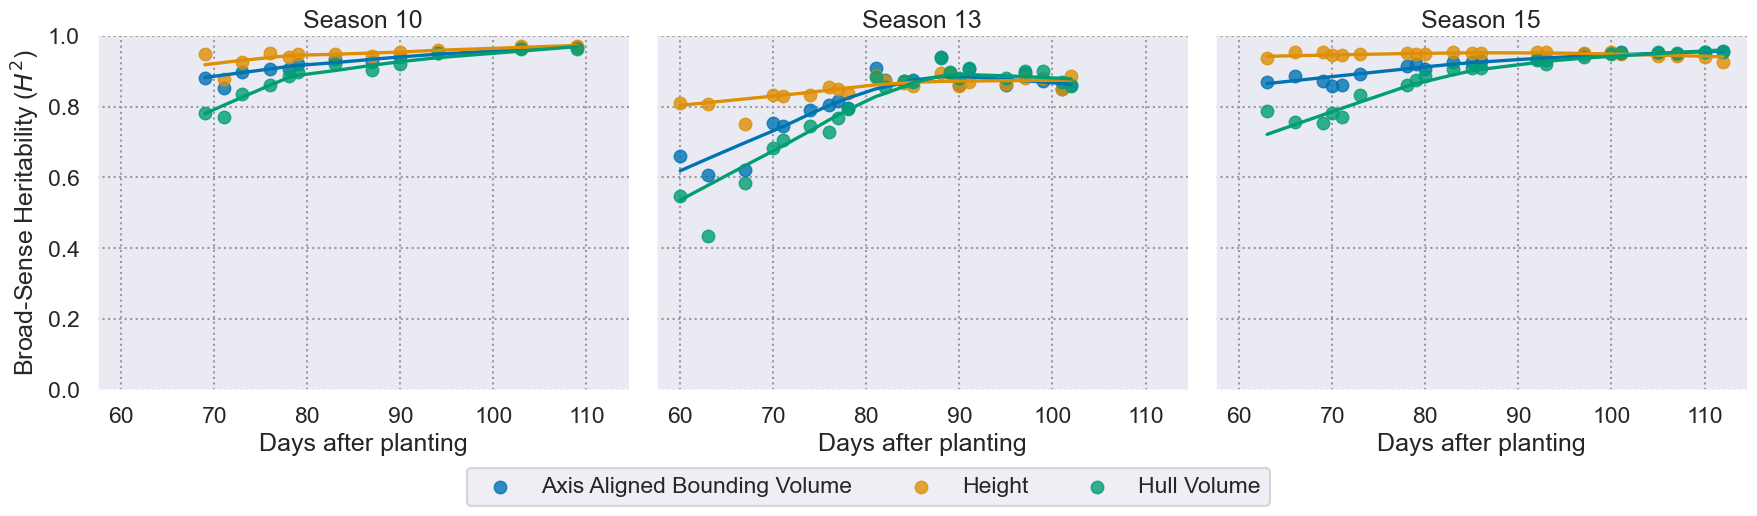

In [18]:
# Convert 'date' to day of year
df['day_of_year'] = df['date'].dt.dayofyear

# Create lmplot with 'season' as column
lm = sns.lmplot(data=df[df['Data Type']=='Traditional'], x='days_after_planting', y='broad_sense_heritability', hue='trait', col='season', lowess=True, legend=True, legend_out=True, aspect=1.2) #, palette="Paired")
lm.set(xlabel='Days after planting', ylabel='Broad-Sense Heritability ($H^2$)', ylim=(0, 1))
lm.set_titles(row_template = '{row_name}', col_template = '{col_name}')

sns.move_legend(
    lm, "lower center",
    bbox_to_anchor=(.41, -0.07), ncol=4, title=None, frameon=True,
)

plt.savefig('figures/heritability_lowess_traditional.png', dpi=900, bbox_inches='tight', facecolor='white', edgecolor='white')
plt.show()

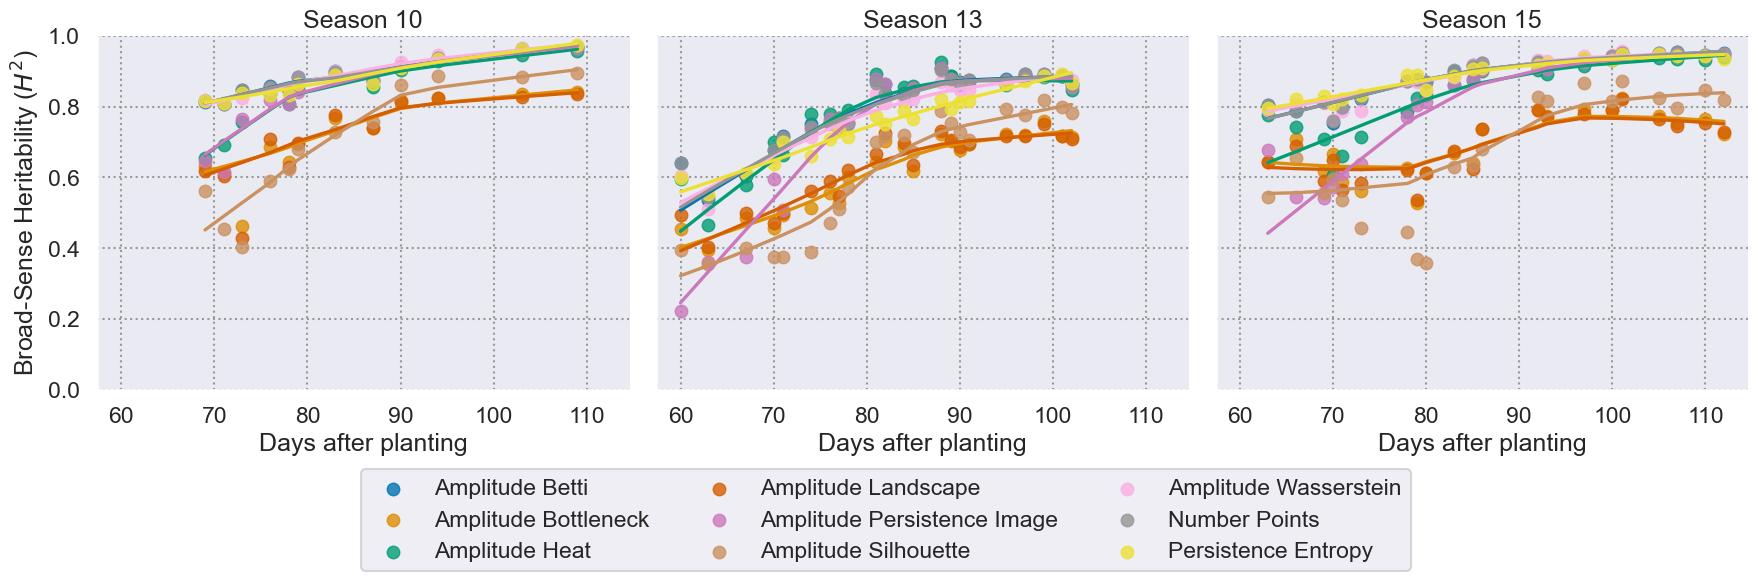

In [19]:
# Convert 'date' to day of year
df['day_of_year'] = df['date'].dt.dayofyear

# Create lmplot with 'season' as column
lm = sns.lmplot(data=df[df['Data Type']=='Topological'], x='days_after_planting', y='broad_sense_heritability', hue='trait', col='season', lowess=True, legend=True, legend_out=True, aspect=1.2) #, palette="Paired")
lm.set(xlabel='Days after planting', ylabel='Broad-Sense Heritability ($H^2$)', ylim=(0, 1))
lm.set_titles(row_template = '{row_name}', col_template = '{col_name}')

sns.move_legend(
    lm, "lower center",
    bbox_to_anchor=(.42, -0.2), ncol=3, title=None, frameon=True,
)


plt.savefig('figures/heritability_lowess_topological.png', dpi=900, bbox_inches='tight', facecolor='white', edgecolor='white')
plt.show()

In [20]:
# # Convert 'date' to day of year
# df['day_of_year'] = df['date'].dt.dayofyear

# # Create scatter plot for each season
# for season in df['season'].unique():
#     df_season = df[df['season'] == season]
#     fig = px.scatter(df_season, x='days_after_planting', y='broad_sense_heritability', trendline='lowess', color='trait')
#     fig.update_layout(title=season, xaxis_title='Day of Year', yaxis_title='Broad Sense Heritability')
#     fig.show()

In [21]:
# # Convert 'date' to day of year
# df['day_of_year'] = df['date'].dt.dayofyear

# # Create scatter plot for each season
# for season in df['season'].unique():
#     df_season = df[df['season'] == season]
#     fig = px.scatter(df_season, x='day_of_year', y='broad_sense_heritability', trendline='lowess', color='trait')
#     fig.update_layout(title=season, xaxis_title='Day of Year', yaxis_title='Repeatability')
#     fig.show()
